In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


ds = pd.read_csv("student_depression_dataset.csv")
ds.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [2]:
valores_ausentes = ds.isnull().sum()
print(valores_ausentes)

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')
[1 0]


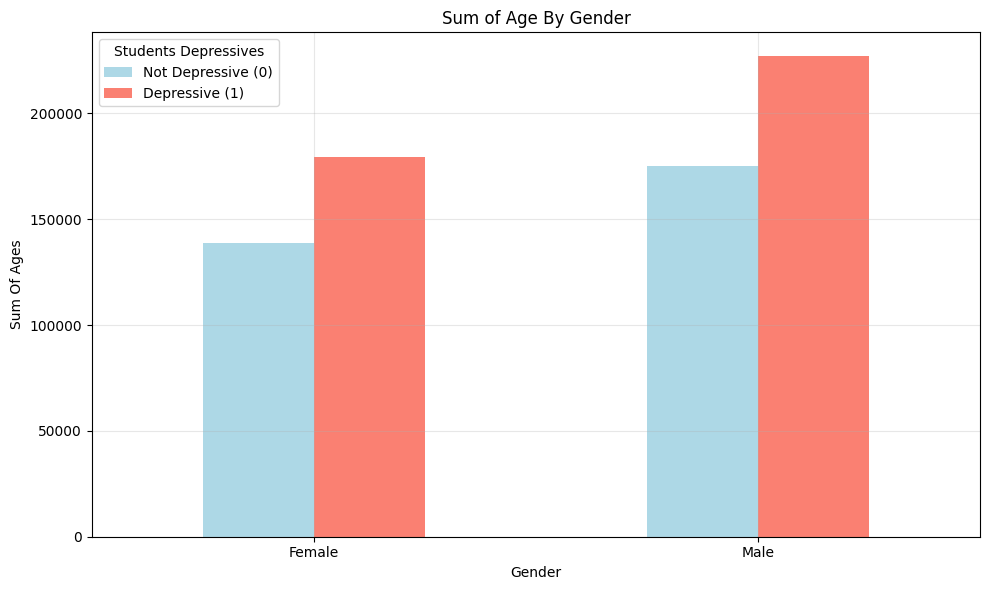

In [3]:
import matplotlib.pyplot as plt

# Verifique as colunas do DataFrame
print(ds.columns)

# Verifique os valores únicos na coluna 'Depression'
print(ds['Depression'].unique())

# Agrupar por Gênero e Depressão, e somar as idades
gender_age_depression = ds.groupby(['Gender', 'Depression'])['Age'].sum().unstack()

# Cores para depressivo (1) e não depressivo (0)
colors = ['lightblue', 'salmon']

# Plotar o gráfico de barras agrupadas
gender_age_depression.plot(kind='bar', color=colors, figsize=(10, 6))
plt.title('Sum of Age By Gender')
plt.xlabel('Gender')
plt.ylabel('Sum Of Ages')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.legend(title='Students Depressives', labels=['Not Depressive (0)', 'Depressive (1)'])
plt.tight_layout()

# Salvar o gráfico
plt.savefig('grouped_bar_gender_depression.png')

# Mostrar o gráfico
plt.show()

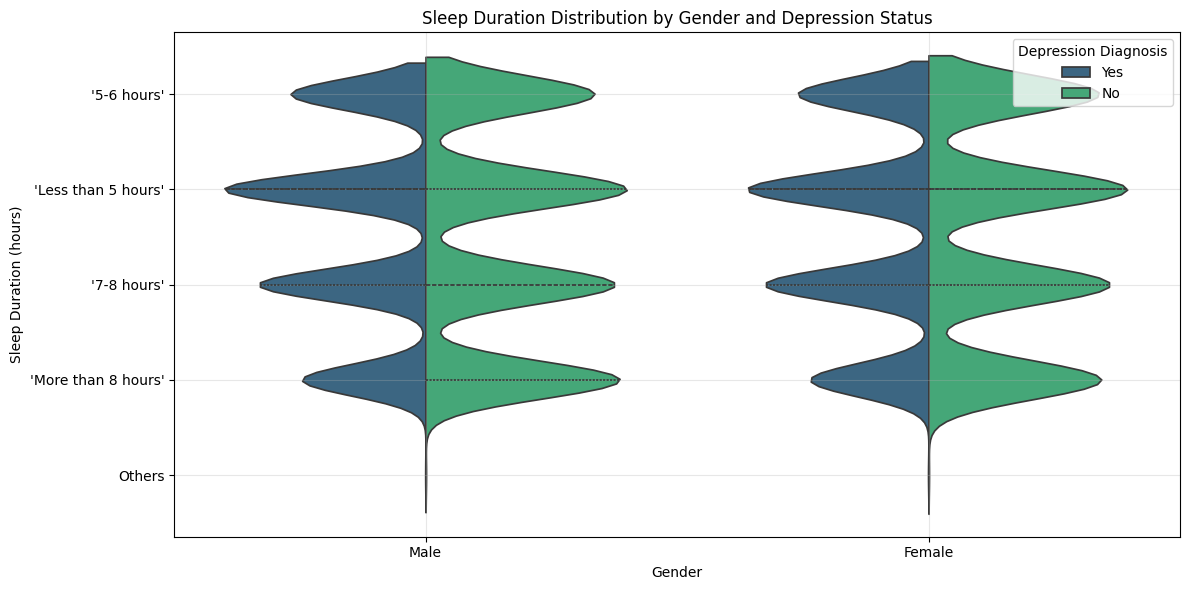

In [24]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=ds, x="Gender", y="Sleep Duration", hue="Have you ever had suicidal thoughts ?", 
              split=True, palette="viridis", inner="quartile")
plt.title("Sleep Duration Distribution by Gender and Depression Status")
plt.xlabel("Gender")
plt.ylabel("Sleep Duration (hours)")
plt.legend(title="Depression Diagnosis", loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()